# Analysis Figures

In [2]:
import pandas as pd

In [25]:
figures_df = pd.read_csv("./figures_articles_with_path_with_colors_with_type.csv")

In [26]:
figures_df

,year,article_id,figure_name,figure_caption,figure_img,figure_path,colors,figure_category,figure_category_name
0,2010,5169847,Fig. 1.,Block diagram of the RF device.,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-1-...,"{'black', 'gray', 'white'}",2,diagrams
1,2010,5169847,Fig. 2.,Percentile variability explained by each princ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-2-...,"{'silver', 'gray', 'navy', 'black'}",0,bar_graphs
2,2010,5169847,Fig. 3.,Projection of devices onto the top three princ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-3-...,"{'black', 'gray', 'silver'}",8,scatter_plot
3,2010,5169847,Fig. 4.,Zoom in the core of functional devices in the ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-4-...,"{'white', 'red', 'blue', 'silver', 'black'}",8,scatter_plot
4,2010,5169847,Fig. 5.,"Test error (i.e., average number of misclassif...",https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-5-...,"{'silver', 'gray', 'black'}",5,line_graphs
...,...,...,...,...,...,...,...,...,...
10762,2023,10121783,FIGURE 1.,Overview of the different FL scenarios.,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr1-3274394...,"{'gray', 'maroon', 'white'}",2,diagrams
10763,2023,10121783,FIGURE 2.,Overview of the operations executed by a node ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr2-3274394...,"{'orange', 'gray', 'navy', 'white'}",2,diagrams
10764,2023,10121783,FIGURE 3.,Distribution of samples across the four first ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr3-3274394...,"{'olive', 'silver', 'gray', 'maroon'}",0,bar_graphs
10765,2023,10121783,FIGURE 4.,Training and validation accuracy on EMNIST and...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr4-3274394...,"{'silver', 'gray', 'orange'}",5,line_graphs


In [28]:
import matplotlib.pyplot as plt

## Count Figures by Year:

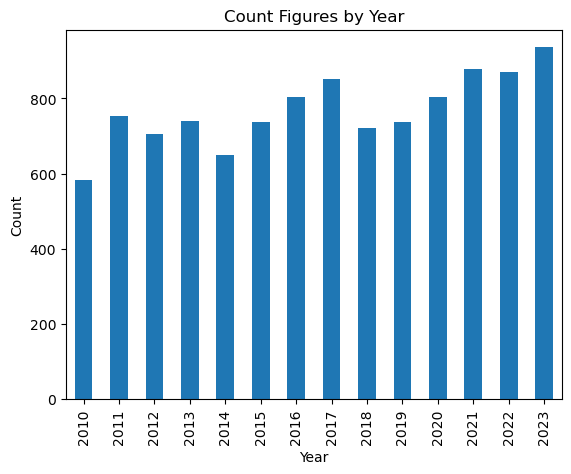

In [29]:
counts_figures_by_year = figures_df.groupby("year")['year'].count()

# Plot
counts_figures_by_year.plot(kind='bar')
plt.title('Count Figures by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Average Figures in Article by Year:

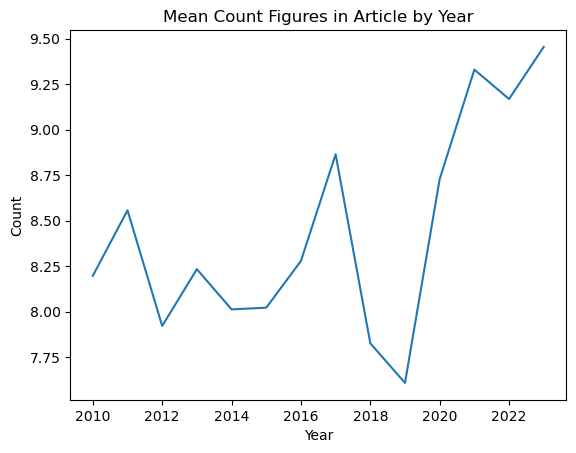

In [30]:
counts_figures_by_year = figures_df.groupby(["year", "article_id"]).size().reset_index(name='counts')
mean_counts = counts_figures_by_year.groupby("year")['counts'].mean()

# Plot
mean_counts.plot(kind='line')
plt.title('Mean Count Figures in Article by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Colors Average in Figures

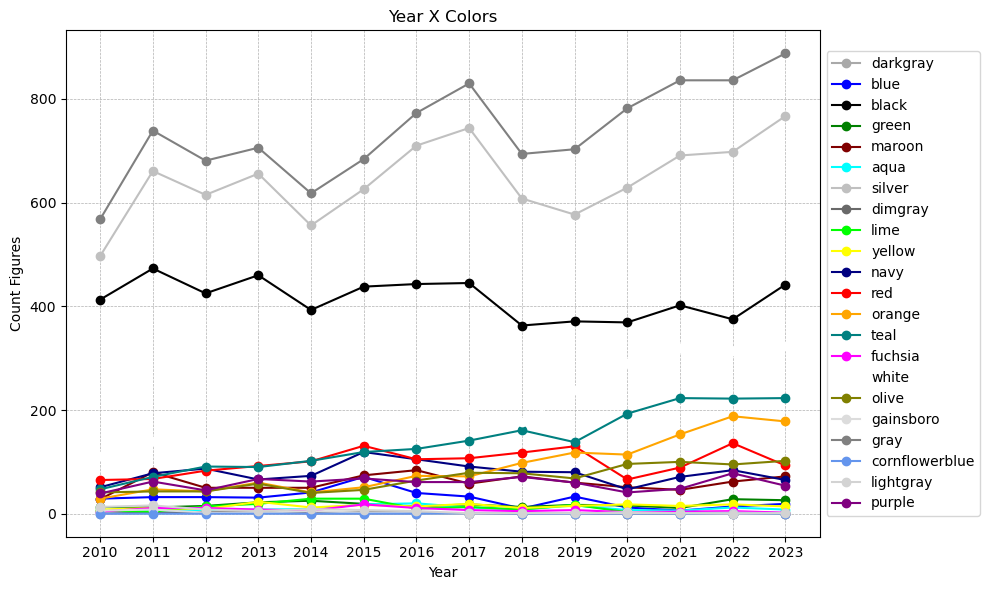

In [53]:
from collections import defaultdict

# Process data for plotting
color_counts = defaultdict(lambda: defaultdict(int))

for year, colors in zip(figures_df["year"].values, figures_df["colors"].values):
    if colors is not None:
        for color in eval(colors):
            color_counts[year][color] += 1

years = sorted(color_counts.keys())
unique_colors = set(color for year_data in color_counts.values() for color in year_data.keys())

# Prepare data for plotting
plot_data = {color: [color_counts[year].get(color, 0) for year in years] for color in unique_colors}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for color, counts in plot_data.items():
    ax.plot(years, counts, label=color, marker='o', color=color)

ax.set_xlabel('Year')
ax.set_ylabel('Count Figures')
ax.set_title('Year X Colors')
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(years)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [54]:
from collections import defaultdict

# Process data for plotting
category_type = defaultdict(lambda: defaultdict(int))

for year, figure_category_name in zip(figures_df["year"].values, figures_df["figure_category_name"].values):
    category_type[year][figure_category_name] += 1



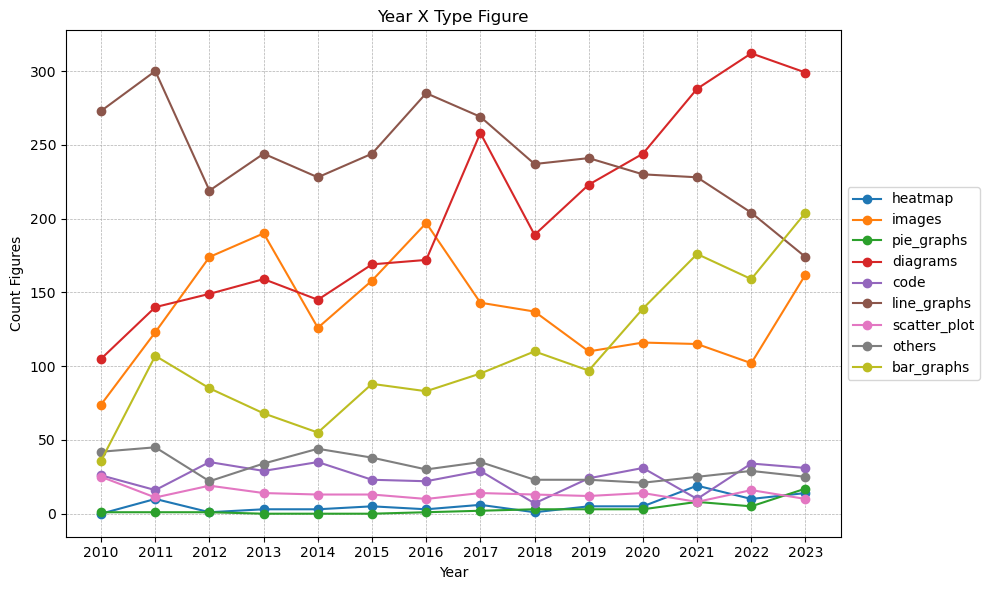

In [57]:
years = sorted(category_type.keys())
unique_category_type = set(category for year_data in category_type.values() for category in year_data.keys())

# Prepare data for plotting
plot_data = {category: [category_type[year].get(category, 0) for year in years] for category in unique_category_type}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for category, counts in plot_data.items():
    ax.plot(years, counts, label=category, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Count Figures')
ax.set_title('Year X Type Figure')
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.xticks(years)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Caption Length Analysis

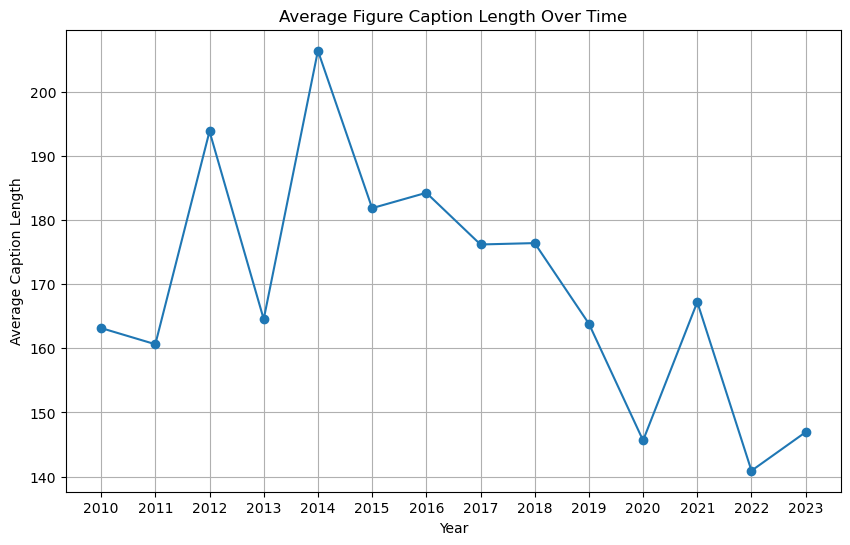

In [61]:
# Calculate caption lengths for each year
figures_df['caption_length'] = figures_df['figure_caption'].apply(len)
yearly_avg_caption_length = figures_df.groupby('year')['caption_length'].mean()

# Plot average caption length over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_caption_length.index, yearly_avg_caption_length.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Caption Length')
plt.title('Average Figure Caption Length Over Time')
plt.xticks(yearly_avg_caption_length.index)
plt.grid()
plt.show()


## Common Keywords Using tf-idf

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all captions for each year
yearly_captions = figures_df.groupby('year')['figure_caption'].apply(lambda x: ' '.join(x))
# Initialize the TF-IDF vectorizer outside the loop
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')

for year, captions in zip(yearly_captions.index, yearly_captions.values):
    # Fit-transform the captions using the vectorizer
    yearly_keyword_counts = vectorizer.fit_transform([captions])
    # Get the most common keywords for each year
    keywords = vectorizer.get_feature_names_out()
    print(f"Year: {year} - Keywords: {', '.join([keywords[i] for i in yearly_keyword_counts.nonzero()[1]])}")


Year: 2010 - Keywords: learning, data, performance, training, different, svm, using, versus, set, number
Year: 2011 - Keywords: error, using, set, different, samples, training, number, results, data, classification
Year: 2012 - Keywords: image, results, classification, set, images, different, learning, using, data, training
Year: 2013 - Keywords: set, class, training, image, results, classification, data, using, different, learning
Year: 2014 - Keywords: classification, set, svm, number, different, training, learning, using, data, results
Year: 2015 - Keywords: set, svm, different, learning, data, using, results, classification, training, elm
Year: 2016 - Keywords: using, different, dataset, set, classification, results, training, elm, data, learning
Year: 2017 - Keywords: proposed, training, using, based, target, data, learning, model, performance, different
Year: 2018 - Keywords: learning, image, training, number, network, features, set, data, using, different
Year: 2019 - Keywords: 

In [94]:
!pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 824.7 kB/s eta 0:00:00


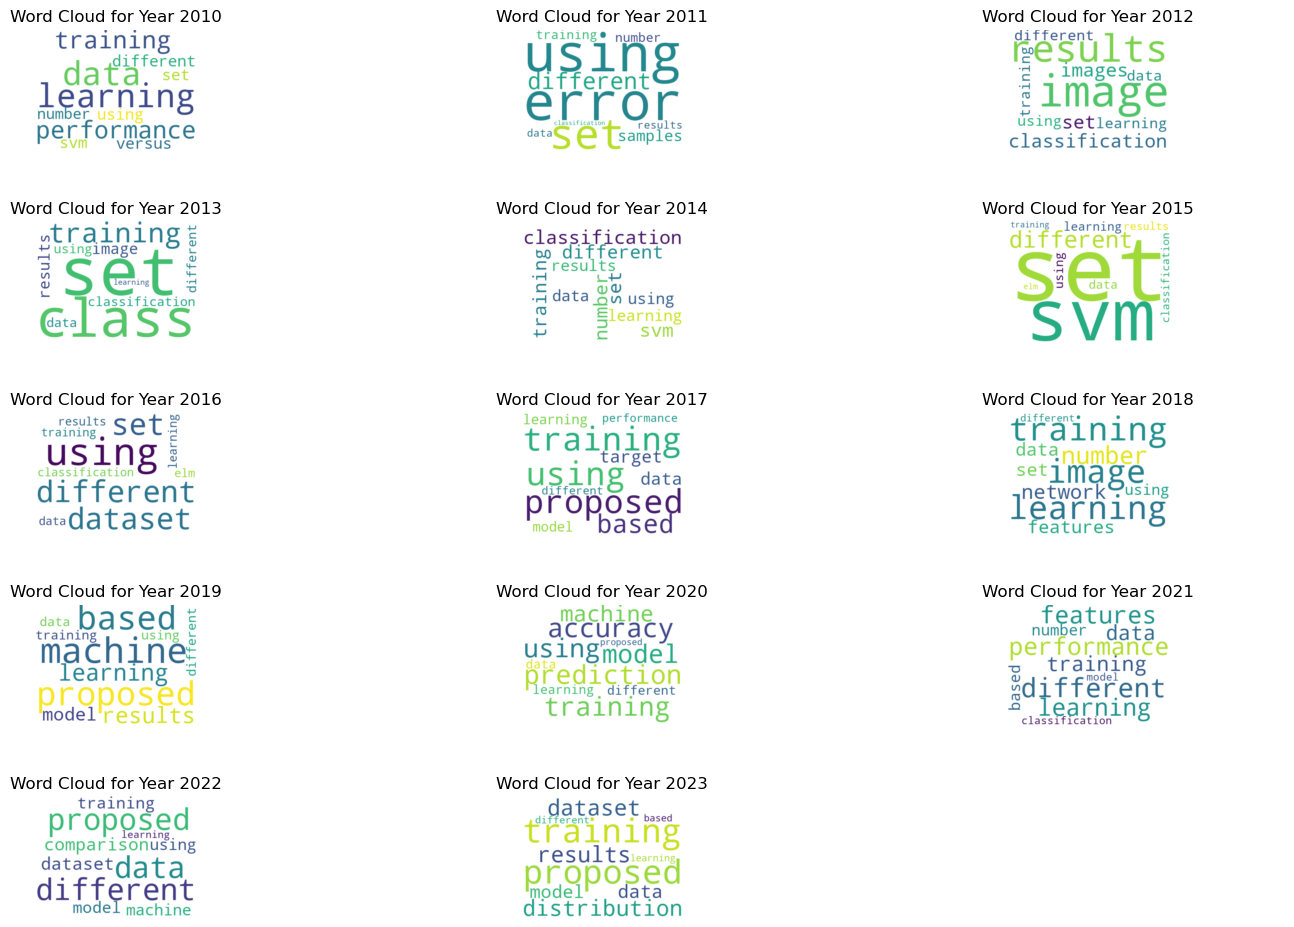

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Combine all captions for each year
yearly_captions = figures_df.groupby('year')['figure_caption'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer outside the loop
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')

# Number of top keywords to display
top_n_keywords = 10

# Create a grid of subplots
num_years = len(yearly_captions)
num_cols = 3  # You can adjust the number of columns
num_rows = (num_years + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.tight_layout(pad=3.0)

for idx, (year, captions) in enumerate(zip(yearly_captions.index, yearly_captions.values)):
    # Fit-transform the captions using the vectorizer
    yearly_keyword_counts = vectorizer.fit_transform([captions])
    
    # Get the most common keywords for each year
    keywords = vectorizer.get_feature_names_out()
    keyword_counts = Counter([keywords[i] for i in yearly_keyword_counts.nonzero()[1]])
    
    # Get the top N keywords
    top_keywords = dict(keyword_counts.most_common(top_n_keywords))
    
    # Create a WordCloud
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(top_keywords)
    
    # Plot the WordCloud in the current subplot
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for Year {year}')
    ax.axis('off')
    
# Hide empty subplots
for idx in range(len(yearly_captions), num_rows * num_cols):
    axes.flatten()[idx].axis('off')

plt.show()


## Sentiment Analysis

In [106]:
!pip install vaderSentiment

In [104]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for year, captions in zip(yearly_captions.index, yearly_captions.values):
    sentiment_scores = [analyzer.polarity_scores(sentence)["compound"] for sentence in captions.split(".")]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    print(f"Year: {year} - Average Sentiment: {average_sentiment:.2f}")


Year: 2010 - Average Sentiment: 0.00
Year: 2011 - Average Sentiment: 0.00
Year: 2012 - Average Sentiment: 0.00
Year: 2013 - Average Sentiment: 0.00
Year: 2014 - Average Sentiment: 0.00
Year: 2015 - Average Sentiment: 0.00
Year: 2016 - Average Sentiment: 0.00
Year: 2017 - Average Sentiment: 0.00
Year: 2018 - Average Sentiment: 0.00
Year: 2019 - Average Sentiment: 0.00
Year: 2020 - Average Sentiment: 0.00
Year: 2021 - Average Sentiment: 0.00
Year: 2022 - Average Sentiment: 0.00
Year: 2023 - Average Sentiment: 0.00
